# Project 2


## The tip of the iceberg or Automatic for the people


## Group 1 9:

- Mussa Banjai
- Tapas Dev
- Jason Kapka

## Introduction

"The Tip of the Iceberg" (or "Automatic for the people") project has been an impregnating experience that has equipped us with valuable knowledge, skills and insights. It has deepened our passion for scientific exploration and environmental conservation and has left us with a sense of responsibility to contribute to the preservation and understanding of Antarctica's fragile ecosystem. It has allowed us to navigate the intricate waters of scientific computation and numerical analysis in the context of Antarctica's unique challenges. In this modern technological era and the ever-evolving landscape of automation, this project stands as a testament to our commitment to harnessing the power of cutting-edge technology for the betterment of Antarctica. This project encapsulates the essence of our journey into uncharted territories, where we have tried to explore the unknown potential hidden beneath the Antarctica. "The Tip of the Iceberg" (or "Automatic for the People") is our endeavor to navigate these waters, uncovering solutions and insights by doing data analysis, logistics and oprations. Throughout the project, we have gone through into different methodologies, numerical algorithms, logistics challenges. The innovation and result of this project have led us to push the boundaries of what is possible. By this project, it is our hope that we will gain a profound understanding of the project's significance, the innovative solutions it offers, and its potential to drive positive change within Antarctica. 

## Abstract

In this world, climate change and environmental preservation hold center stage, our endeavor navigates the waters of scientific exploration and innovation, with the goal of reshaping the way we understand, protect, and interact with this pristine polar landscape. "The Tip of the Iceberg" (or "Automatic for the people") project represents a comprehensive exploration of the challenges and opportunities presented by the enigmatic realm of Antarctica.
By completing this project, we have learnt to structure and craft comprehensive reports. It helped us to share our findings and insights effectively. Besides, we have used new functions and classes, building essential skills for scientific computation in the context of Antarctica in python which will help us to do coding more efficiently in future. The uses of Python classes is demonstrated to simplify the implementation of numerical algorithms, ensuring modularity and readability in the face of Antarctica's unique demands. This project also helpful to explore the intricacies of round-off errors and truncation errors, vital considerations when conducting calculations in this challenging environment since Antarctica's extreme conditions demand precision in numerical computation.

## Exercises

### Import

In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import rockhound as rh
import cmocean
import sys

**Pressure Solver**

In [3]:
class PressureSolver:
    """
    A finite difference solver to solve pressure distribution in 
    a reservoir, logarithmic grid has been used, y = ln(r/rw) 

    The solver uses SI units internally, while "practical field units"
    are required as input.

    Input arguments:

        name                                symbol      unit
        --------------------------------------------------------------
        Number of grid points                N          dimensionless
        Constant time step                   dt         days
        Well radius                          rw         ft
        Outer reservoir boundary             re         ft
        Height of reservoir                  h          ft
        Absolute permeability                k          mD
        Porosity                             phi        dimensionless
        Fluid viscosity                      mu         mPas (cP)
        Total (rock+fluid) compressibility   ct         1 / psi
        Constant flow rate at well           Q          bbl / day
        Initial reservoir pressure           pi         psi
        -------------------------------------------------------------
    """

    def __init__(self,
                 N,
                 dt,
                 rw=0.318,
                 re=1000.0,
                 h=11.0,
                 phi=0.25,
                 mu=1.0,
                 ct=7.8e-6,
                 Q=1000.0,
                 k=500,
                 pi=4100.0):

        # Unit conversion factors (input units --> SI)
        self.ft_to_m_ = 0.3048
        self.psi_to_pa_ = 6894.75729
        self.day_to_sec_ = 24.*60.*60.
        self.bbl_to_m3_ = 0.1589873

        # Grid
        self.N_ = N
        self.rw_ = rw*self.ft_to_m_
        self.re_ = re*self.ft_to_m_
        self.h_ = h*self.ft_to_m_

        # Rock and fluid properties
        self.k_ = k*1e-15 / 1.01325 # from Darcy to m^2
        self.phi_ = phi
        self.mu_ = mu*1e-3 # from cP to Pas
        self.ct_ = ct / self.psi_to_pa_

        # Initial and boundary conditions
        self.Q_ = Q*self.bbl_to_m3_ / self.day_to_sec_
        self.pi_ = pi*self.psi_to_pa_

        # Time control for simulation
        self.dt_ = dt*self.day_to_sec_

        # TO DO: Add more stuff below here....
        # (grid coordinates, dy, eta, etc.)


### Exercise 1

### Exercise 2

#### Part 1

#### Part 2

In [5]:
"""
N = 4
dt = 0.01
"""
ps = PressureSolver(4,0.01)

### Exercise 3

**Thomas Algorithm**

In [ ]:
@nb.jit(nopython=True)
def thomas_algorithm(l, d, u, r):
    """
    Solves a tridiagonal linear system of equations with the Thomas-algorithm.

    The code is based on pseudo-code from the following reference:

        Cheney, E. W., & Kincaid, D. R.
        Numerical mathematics and computing, 7th edition,
        Cengage Learning, 2013.

    IMPORTANT NOTES:
        - This function modifies the contents of the input vectors l, d, u and rhs.
        - For Numba to work properly, we must input NumPy arrays, and not lists.

    :param l: A NumPy array containing the lower diagonal (l[0] is not used).
    :param d: A NumPy array containing the main diagonal.
    :param u: A NumPy array containing the upper diagonal (u[-1] is not used).
    :param r: A NumPy array containing the system right-hand side vector.
    :return: A NumPy array containing the solution vector.
    """
    # Allocate memory for solution
    solution = np.zeros_like(d)
    n = len(solution)

    # Forward elimination
    for k in range(1, n):
        xmult = l[k] / d[k-1]
        d[k] = d[k] - xmult*u[k-1]
        r[k] = r[k] - xmult*r[k-1]

    # Back-substitution
    solution[n-1] = r[n-1] / d[n-1]
    for k in range(n-2, -1, -1):
        solution[k] = (r[k]-u[k]*solution[k+1])/d[k]

    return solution

### Exercise 4

#### Part 1

#### Part 2

In [10]:
"""
Read the well test data
"""
df = pd.read_csv("data/well_bhp.dat", delimiter="\t")
print(df)


           time  well_pressure
0      1.000000    3775.204835
1      5.000000    3740.949470
2     10.000000    3728.708408
3     15.000000    3721.164836
4     19.999999    3715.811339
5     30.000000    3708.776561
6     39.999998    3703.638589
7     49.999999    3699.627128
8     60.000000    3696.351880
9     70.000001    3693.591952
10    79.999999    3691.210428
11    90.000000    3689.119996
12    99.999996    3687.257853
13   199.999992    3676.254980
14   300.000000    3670.226185
15   500.000016    3664.257292
16   750.000000    3660.883563
17  1000.000032    3659.345145
18  1500.000000    3658.432856
19  1749.999936    3658.224146
20  2000.000064    3658.128276
21  2499.999840    3658.071421
22  2750.000160    3658.058367
23  3000.000000    3658.052421


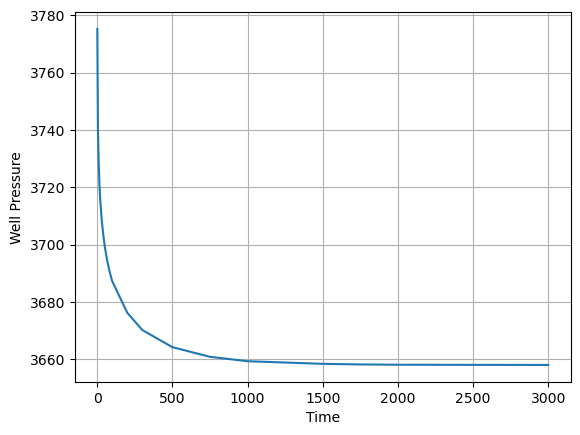

In [13]:
plt.plot(df["time"], df["well_pressure"])
plt.xlabel("Time")
plt.ylabel("Well Pressure")
plt.grid()

## Reflections

"The Tip of the Iceberg" (or "Automatic for the people") project has been an enriching experience that has equipped us with valuable skills and insights. It has deepened our passion for scientific exploration and environmental conservation and has left us with a sense of responsibility to contribute to the preservation and understanding of Antarctica's fragile ecosystem. It has allowed us to navigate the intricate waters of scientific computation and numerical analysis in the context of Antarctica's unique challenges. This endeavor has not only deepened our understanding of the subject matter but has also honed our problem-solving skills and expanded our technical proficiency. One of the most valuable aspects of this project has been the opportunity to develop and refine our report-writing skills. Crafting a comprehensive report that effectively communicates complex ideas is an essential skill in any scientific discipline. Through this project, we have learned to structure and present my findings in a clear and organized manner, ensuring that the significance of the work is readily apparent to others. Expanding our Python proficiency has been another highlight of this journey. Python's versatility and power as a programming language became evident as we created new functions and classes to address the unique challenges posed by Antarctica's extreme conditions. Discovering and leveraging Python libraries for scientific exploration has been an eye-opener. These skills will undoubtedly serve us well in future scientific endeavors and computational projects. Although we were struggling with the calculations for finding round-off and truncation errors in the begining but after going through the lectures as well as other solutions of the the nuances of numerical errors available in google, helped us well to explore round-off errors and truncation errors, which has been a thought-provoking experience. Antarctica's unforgiving environment demands precision in numerical computation, and we now have a deeper appreciation for the importance of managing these errors effectively in scientific research. If we can get additional data and do more data analysis about this project, use more functions precisely with good knowledge of python and finally compare each result with others then we are optimistic that the outcome will be more accurate which could be done in future.
To conclude, this project has been a good experience for us. It was a satisfied group work. Moving forward in our academic and professional journey, we are carrying with us the lessons and experiences gained from this project, ready to face new challenges and opportunities with a greater sense of purpose and proficiency.


## Conclusion

"The Tip of the Iceberg" (or "Automatic for the people") project has not only sharpened our problem-solving abilities and elevated our technical competence but has also fostered the art of effective communication. Crafting meticulous reports that distill intricate concepts into digestible information has become second nature, ensuring that the significance of our work shines brightly. Our exploration of Python's capabilities has been a revelation, unveiling a powerful tool for innovation and data analysis. We've harnessed Python's versatility to confront the unique challenges of Antarctica, unlocking new avenues for scientific exploration. We have gone through ("Python Functions Tutorial in Datacamp") as well as ("Libraries in python lectures in geeksforgeeks") for learning more about python which helped us a lot in this project. We used some basic syntax in numpy library and how it helps in making arrays and doing necessary calculations efficiently. We also learnt matplotlib library and its use in making useful visualizations of data for better understanding. The discovery and utilization of Python libraries tailored to our needs have widened our horizons, setting the stage for future scientific pursuits and computational endeavors. This project has helped us understanding of how computers handle numbers; its limitations in maximum and minimum values and the machine precison in calculations. Delving into the subtleties of numerical errors, especially the unforgiving precision required in Antarctica's research, has left an indelible impression. We now appreciate more than ever the importance of error management in scientific research, where the margin for imprecision is slim. To get more knowledge about numerical errors, particularly, round-off error and truncation error, we went through some lecture and tutorials available in ("kapilcaet and web.engr"). We also read case studies of spill risk assesments regarding the tip of the iceberg which helped us to understand the behavior of iceberg in Antarctica and risk assessments used in environmental impact statements.
Overall, this assignment helped us in getting familiarized with the pyhton languange and understand its basic objects, such as functions and classes in making a more efficient script. Besides, it also helped us to learn numerical calculation in python environment.

## References

1) Aksel Hiorth. Computational Engineering and Modeling. 
   https://github.com/ahiorth/CompEngineering, 2021.
2) https://kapilcaet.files.wordpress.com/2015/01/unit-4-round-off-and-truncation-errors.pdf
3) https://web.engr.oregonstate.edu/~webbky/MAE4020_5020_files/Section%204%20Roundoff%20and%20Truncation%20Error.pdf
4) https://www.datacamp.com/tutorial/functions-python-tutorial
5) https://www.geeksforgeeks.org/libraries-in-python/
6) https://www.sciencedirect.com/science/article/pii/S0025326X19307611